In [ ]:
pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.models import Model
import efficientnet.tfkeras as efn
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
def build_model(base_model, model_name):
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    predictions = tf.keras.layers.Dense(10, activation='softmax', name='output')(x)
    model = Model(inputs=base_model.input, outputs=predictions, name=model_name)

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
def train_model(model, model_name):
    checkpoint = ModelCheckpoint(f'{model_name}_best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        validation_data=(x_test, y_test),
                        callbacks=[checkpoint, early_stopping])

    return history


In [ ]:
def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()


16804768/16804768 [==============================] - 0s 0us/step


Training VGG16...
Epoch 1/20
391/391 [==============================] - ETA: 0s - loss: 1.8860 - accuracy: 0.2575
Epoch 1: val_accuracy improved from -inf to 0.40590, saving model to VGG16_best_model.h5
391/391 [==============================] - 20s 15ms/step - loss: 1.8860 - accuracy: 0.2575 - val_loss: 1.4679 - val_accuracy: 0.4059
Epoch 2/20
391/391 [==============================] - ETA: 0s - loss: 1.2193 - accuracy: 0.5422
Epoch 2: val_accuracy improved from 0.40590 to 0.63480, saving model to VGG16_best_model.h5
391/391 [==============================] - 5s 12ms/step - loss: 1.2193 - accuracy: 0.5422 - val_loss: 1.0168 - val_accuracy: 0.6348
Epoch 3/20
391/391 [==============================] - ETA: 0s - loss: 0.8793 - accuracy: 0.6894
Epoch 3: val_accuracy improved from 0.63480 to 0.71960, saving model to VGG16_best_model.h5
391/391 [==============================] - 5s 12ms/step - loss: 0.8793 - accuracy: 0.6894 - val_loss: 0.8226 - val_accuracy: 0.7196
Epoch 4/20
390/391 [====

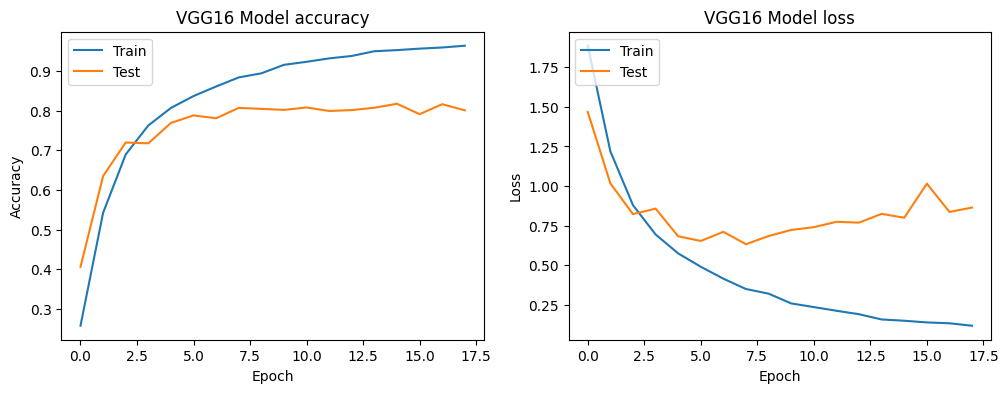



Training VGG19...
Epoch 1/20
389/391 [============================>.] - ETA: 0s - loss: 1.9365 - accuracy: 0.2166
Epoch 1: val_accuracy improved from -inf to 0.29530, saving model to VGG19_best_model.h5
391/391 [==============================] - 11s 15ms/step - loss: 1.9359 - accuracy: 0.2170 - val_loss: 1.9212 - val_accuracy: 0.2953
Epoch 2/20
389/391 [============================>.] - ETA: 0s - loss: 1.5063 - accuracy: 0.4118
Epoch 2: val_accuracy improved from 0.29530 to 0.49190, saving model to VGG19_best_model.h5
391/391 [==============================] - 5s 14ms/step - loss: 1.5058 - accuracy: 0.4121 - val_loss: 1.3432 - val_accuracy: 0.4919
Epoch 3/20
389/391 [============================>.] - ETA: 0s - loss: 1.1775 - accuracy: 0.5656
Epoch 3: val_accuracy improved from 0.49190 to 0.59340, saving model to VGG19_best_model.h5
391/391 [==============================] - 5s 14ms/step - loss: 1.1774 - accuracy: 0.5657 - val_loss: 1.1570 - val_accuracy: 0.5934
Epoch 4/20
391/391 [==

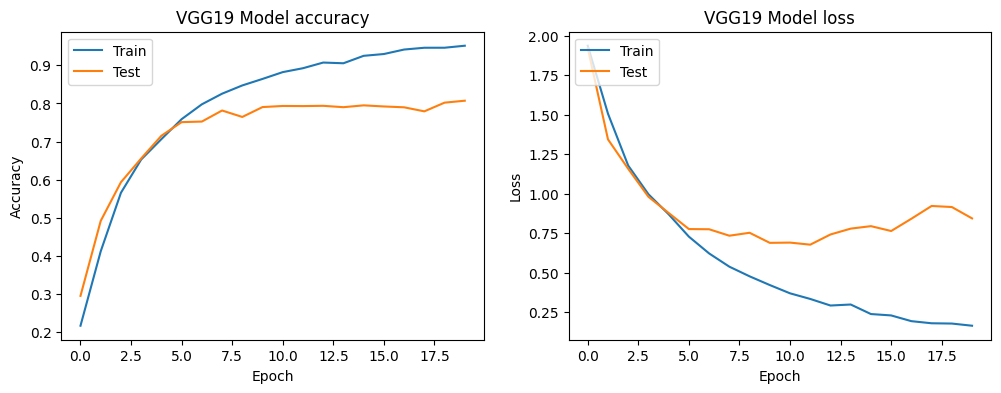



Training ResNet50...
Epoch 1/20
391/391 [==============================] - ETA: 0s - loss: 1.1860 - accuracy: 0.6153
Epoch 1: val_accuracy improved from -inf to 0.10010, saving model to ResNet50_best_model.h5
391/391 [==============================] - 55s 47ms/step - loss: 1.1860 - accuracy: 0.6153 - val_loss: 3.6904 - val_accuracy: 0.1001
Epoch 2/20
391/391 [==============================] - ETA: 0s - loss: 0.8234 - accuracy: 0.7302
Epoch 2: val_accuracy improved from 0.10010 to 0.37070, saving model to ResNet50_best_model.h5
391/391 [==============================] - 16s 41ms/step - loss: 0.8234 - accuracy: 0.7302 - val_loss: 1.9052 - val_accuracy: 0.3707
Epoch 3/20
391/391 [==============================] - ETA: 0s - loss: 0.7236 - accuracy: 0.7674
Epoch 3: val_accuracy did not improve from 0.37070
391/391 [==============================] - 15s 38ms/step - loss: 0.7236 - accuracy: 0.7674 - val_loss: 13.2975 - val_accuracy: 0.1066
Epoch 4/20
391/391 [==============================]

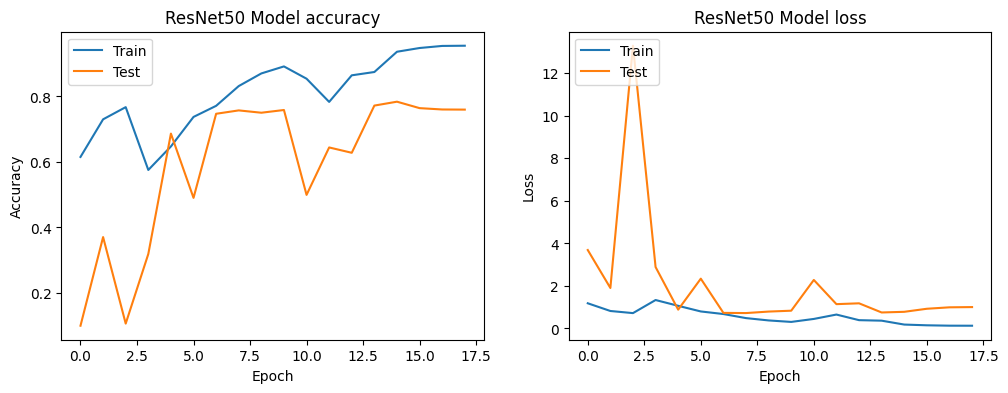



Training EfficientNetB0...
Epoch 1/20
391/391 [==============================] - ETA: 0s - loss: 0.9689 - accuracy: 0.6696
Epoch 1: val_accuracy improved from -inf to 0.75300, saving model to EfficientNetB0_best_model.h5
391/391 [==============================] - 59s 46ms/step - loss: 0.9689 - accuracy: 0.6696 - val_loss: 0.7614 - val_accuracy: 0.7530
Epoch 2/20
391/391 [==============================] - ETA: 0s - loss: 0.5489 - accuracy: 0.8112
Epoch 2: val_accuracy improved from 0.75300 to 0.80340, saving model to EfficientNetB0_best_model.h5
391/391 [==============================] - 17s 43ms/step - loss: 0.5489 - accuracy: 0.8112 - val_loss: 0.6132 - val_accuracy: 0.8034
Epoch 3/20
390/391 [============================>.] - ETA: 0s - loss: 0.4270 - accuracy: 0.8527
Epoch 3: val_accuracy improved from 0.80340 to 0.81500, saving model to EfficientNetB0_best_model.h5
391/391 [==============================] - 17s 43ms/step - loss: 0.4272 - accuracy: 0.8527 - val_loss: 0.5973 - val_a

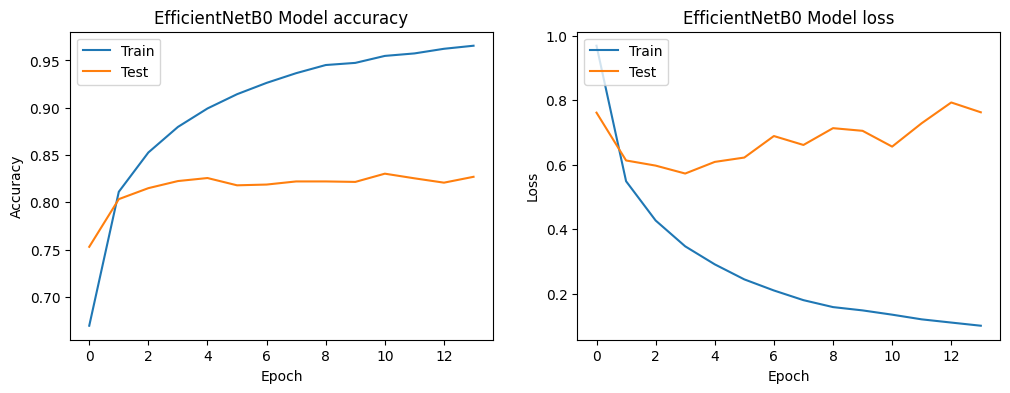

In [ ]:
# Define the models to compare
models_to_compare = {
    'VGG16': VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet'),
    'VGG19': VGG19(input_shape=(32, 32, 3), include_top=False, weights='imagenet'),
    'ResNet50': ResNet50(input_shape=(32, 32, 3), include_top=False, weights='imagenet'),
    'EfficientNetB0': efn.EfficientNetB0(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
}

# Train each model and print the results
for model_name, base_model in models_to_compare.items():
    print(f"Training {model_name}...")
    model = build_model(base_model, model_name)
    history = train_model(model, model_name)

    # Evaluate the model
    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test)

    print(f"{model_name} Results:")
    print(f"Training Error: {train_loss:.4f}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Error: {test_loss:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    
    # Plot the training loss and training accuracy over epochs
    plot_history(history, model_name)
    print("\n")
